PHASE 1: The Detective Work (Setup & Inspection)

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [25]:
df = pd.read_csv(r"D:\VS-Studio\DS_AI_Internship\Day-20\customer_analytics.csv")
df.head()

,CustomerID,Age,Gender,City,Education,MaritalStatus,AnnualIncome,SpendingScore,YearsEmployed,PurchaseFrequency,OnlineVisitsPerMonth,ReturnedItems,PreferredDevice,LastPurchaseAmount
0,1001,49,Male,Pune,Masters,Single,82953.0,66,23,19,9,2,Laptop,3944
1,1002,44,Male,Pune,PhD,Single,60610.0,56,22,1,23,3,Desktop,3885
2,1003,42,Male,Mumbai,Bachelors,Single,35501.0,44,18,10,29,3,Laptop,3247
3,1004,36,Female,Mumbai,Masters,Married,99312.0,36,10,12,21,3,Mobile,2028
4,1005,23,Male,Pune,Masters,Married,46980.0,56,1,18,9,3,Tablet,1100


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            255 non-null    int64  
 1   Age                   255 non-null    int64  
 2   Gender                255 non-null    object 
 3   City                  255 non-null    object 
 4   Education             243 non-null    object 
 5   MaritalStatus         255 non-null    object 
 6   AnnualIncome          243 non-null    float64
 7   SpendingScore         255 non-null    int64  
 8   YearsEmployed         255 non-null    int64  
 9   PurchaseFrequency     255 non-null    int64  
 10  OnlineVisitsPerMonth  255 non-null    int64  
 11  ReturnedItems         255 non-null    int64  
 12  PreferredDevice       255 non-null    object 
 13  LastPurchaseAmount    255 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 28.0+ KB


In [28]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore,YearsEmployed,PurchaseFrequency,OnlineVisitsPerMonth,ReturnedItems,LastPurchaseAmount
count,255.000000,255.000000,243.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000
mean,1126.941176,37.729412,74499.901235,45.721569,14.682353,11.568627,16.078431,1.858824,2795.07451
std,72.397256,9.767842,43939.855655,17.869522,9.651664,7.077899,7.909536,1.409917,1328.77241
min,1001.000000,21.000000,16062.000000,5.000000,1.000000,1.000000,3.000000,0.000000,566.00000
25%,1064.500000,29.000000,56353.000000,34.500000,6.000000,5.000000,10.000000,1.000000,1542.50000
50%,1128.000000,38.000000,69629.000000,47.000000,15.000000,11.000000,16.000000,2.000000,2705.00000
75%,1190.500000,46.000000,84030.500000,57.500000,23.000000,18.000000,23.000000,3.000000,4001.00000
max,1250.000000,54.000000,474327.000000,95.000000,34.000000,24.000000,29.000000,4.000000,4996.00000


Dataset Understanding(Phase-1)

The dataset contains structured customer information including demographic attributes and purchasing behavior. Each row represents an individual customer, and the columns describe characteristics such as age, gender, income level, and spending behavior.
Initial inspection using .head(), .info(), and .describe() revealed the dataset size, data types, and statistical distribution of numerical variables. The dataset contains both numerical and categorical features, making it suitable for both descriptive and relationship-based analysis.

PHASE 2: The Cleanup (Data Preprocessing)

In [29]:
df.isnull().sum()

CustomerID               0
Age                      0
Gender                   0
City                     0
Education               12
MaritalStatus            0
AnnualIncome            12
SpendingScore            0
YearsEmployed            0
PurchaseFrequency        0
OnlineVisitsPerMonth     0
ReturnedItems            0
PreferredDevice          0
LastPurchaseAmount       0
dtype: int64

In [ ]:
for col in df.select_dtypes(include='number').columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [31]:
df.duplicated().sum()

5

In [32]:
df.drop_duplicates(inplace=True)

Data Preprocessing Summary(Phase-2)

Missing values were identified and handled carefully to ensure data reliability. Numerical columns were filled using the median to avoid the influence of extreme values, while categorical columns were filled using the mode to preserve category distribution.
Duplicate records were checked and removed to maintain data integrity and prevent biased insights.
These preprocessing steps ensured that the dataset was clean, consistent, and ready for meaningful exploratory analysis.

PHASE 3: The Deep Dive

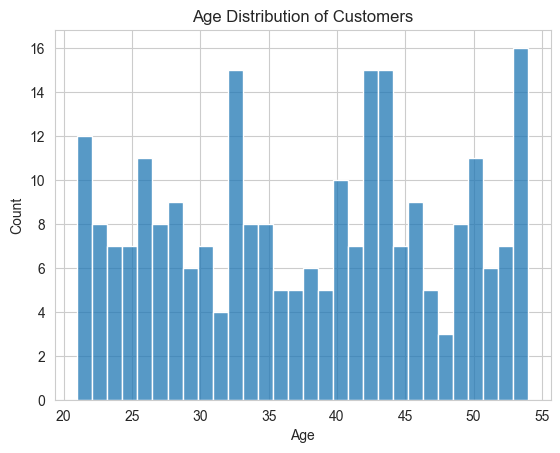

In [ ]:
#Age Distribution
plt.figure()
sns.histplot(df['Age'], bins=30)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

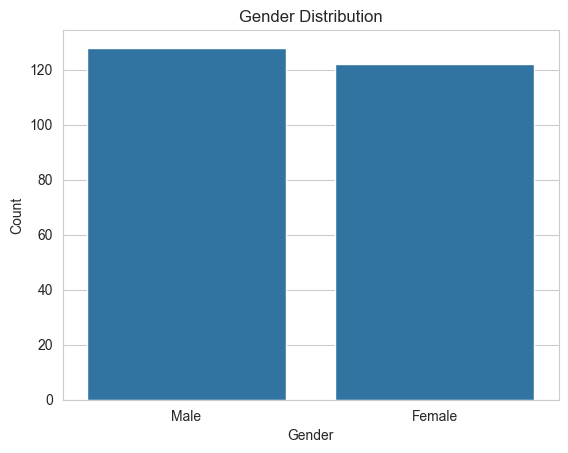

In [34]:
#Gender Distribution
plt.figure()
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

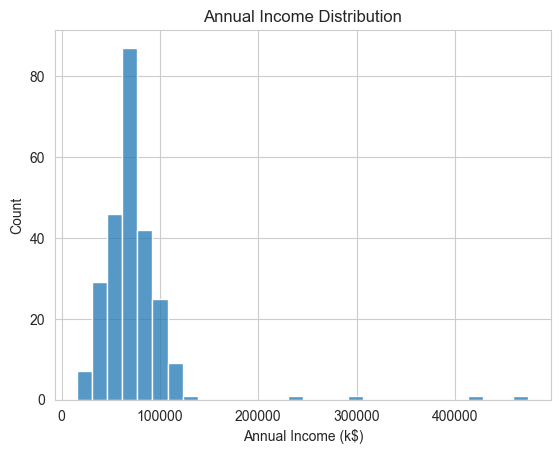

In [37]:
#Annual Income Distribution
plt.figure()
sns.histplot(df['AnnualIncome'], bins=30)
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Count")
plt.show()

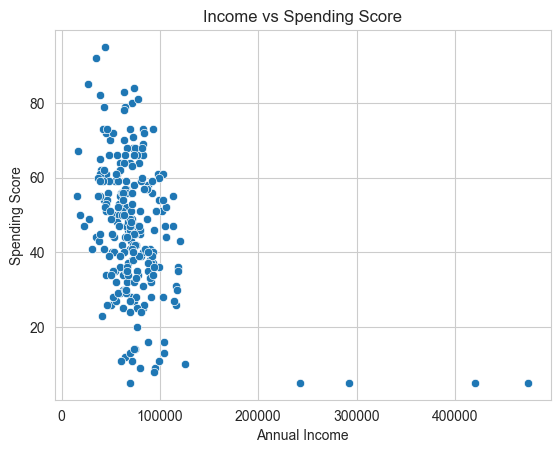

In [39]:
#Income vs Spending Score
plt.figure()
sns.scatterplot(x='AnnualIncome', y='SpendingScore', data=df)
plt.title("Income vs Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

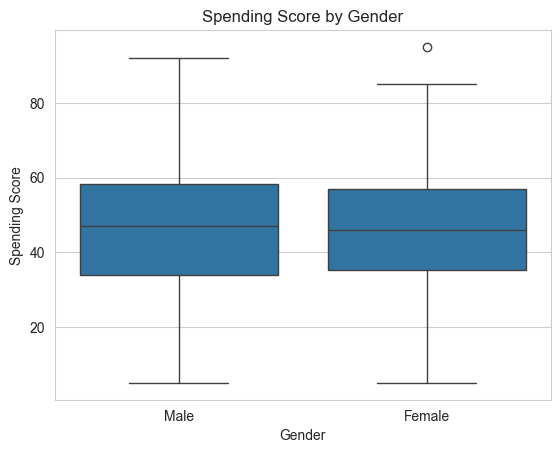

In [40]:
#Gender vs Spending Score
plt.figure()
sns.boxplot(x='Gender', y='SpendingScore', data=df)
plt.title("Spending Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Spending Score")
plt.show()

Univariate Insights (Phase-3)

The age distribution shows that the majority of customers fall within the young to middle-aged group, suggesting that the business primarily targets working-age individuals.
The gender distribution indicates whether the customer base is balanced or dominated by a specific segment.
The income distribution reveals the purchasing capacity of customers, helping to understand whether the business attracts low, middle, or high-income groups.

Bivariate Insights (Phase-3)

The relationship between income and spending score reveals whether higher income customers necessarily spend more or if spending behavior is independent of income level.
The comparison of spending score across genders highlights differences in purchasing behavior between demographic segments.
These relationships provide valuable insight into customer segmentation and potential marketing strategies.

PHASE 4: The Big Picture

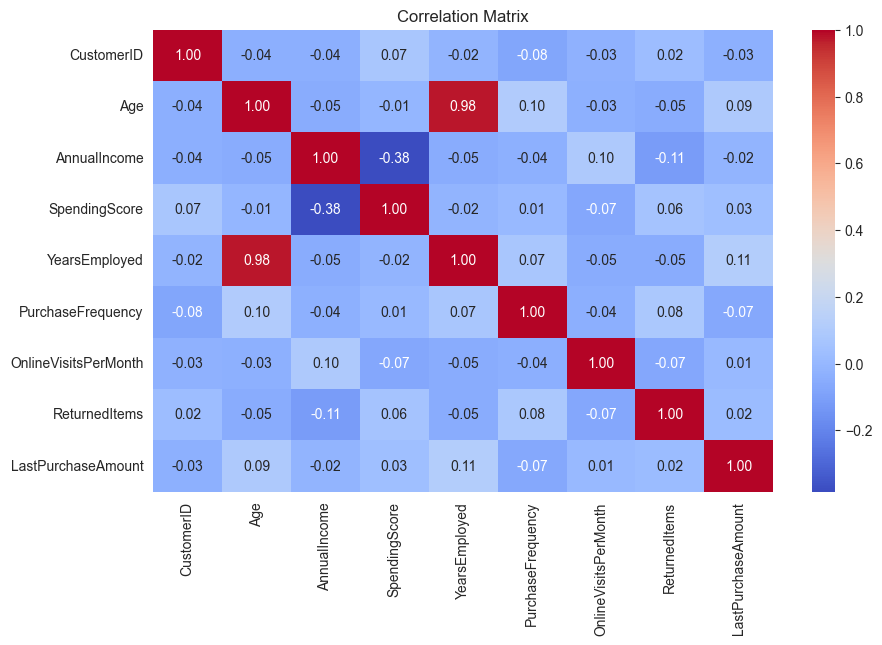

In [41]:
plt.figure(figsize=(10,6))

numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Matrix")
plt.show()

Correlation Matrix Interpretation (Phase-4)

The correlation matrix highlights the strength and direction of relationships between numerical variables.
A strong positive correlation between income and spending suggests that higher income customers contribute significantly to revenue.
Weak or negative correlations indicate that some variables operate independently, providing insight into behavioral diversity among customers.